Noise in Image Using CNN

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, GaussianNoise, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np


In [ ]:
from tensorflow.keras import datasets


##################################
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

print (x_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Assuming input_shape is the shape of your RGB images (32, 32, 3) for CIFAR-10
input_shape = (32, 32, 3)

input_shape = (32, 32, 3)
# Input layer
input_img = Input(shape=input_shape)
# Add Gaussian noise to the original image
noisy_input = GaussianNoise(stddev=0.1)(input_img)

In [ ]:
# Adding Gaussian noise to training images
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

# Clip values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

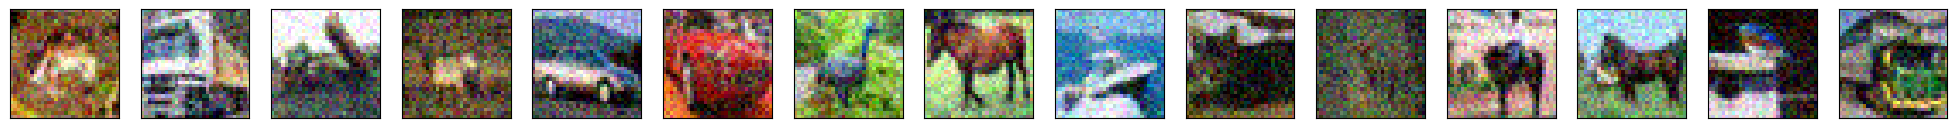

In [ ]:
n = 15
plt.figure(figsize=(25, 5))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(32, 32 , 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
# Encoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(noisy_input)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder_original_image = Model(input_img, decoded)

#encoder
encoder=Model(input_img, encoded)

# Decoder model
decoder_original_image = Model(encoded, decoded)


autoencoder_original_image.compile(optimizer=Adam(), loss='mean_squared_error')


In [ ]:
# Fiting the model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
autoencoder_original_image.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, x_test),
                  callbacks=[early_stopping]
                )


Epoch 1/10
100/100 [==============================] - 172s 2s/step - loss: 0.0078 - val_loss: 0.0209
Epoch 2/10
100/100 [==============================] - 164s 2s/step - loss: 0.0074 - val_loss: 0.0193
Epoch 3/10
100/100 [==============================] - 168s 2s/step - loss: 0.0071 - val_loss: 0.0166
Epoch 4/10
100/100 [==============================] - 163s 2s/step - loss: 0.0069 - val_loss: 0.0137
Epoch 5/10
100/100 [==============================] - 168s 2s/step - loss: 0.0067 - val_loss: 0.0151
Epoch 6/10
100/100 [==============================] - 167s 2s/step - loss: 0.0066 - val_loss: 0.0140
Epoch 7/10
100/100 [==============================] - 163s 2s/step - loss: 0.0064 - val_loss: 0.0144


In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder_original_image.predict(encoded_imgs)



313/313 [==============================] - 5s 16ms/step


In [ ]:
encoded_imgs.shape

(10000, 8, 8, 32)

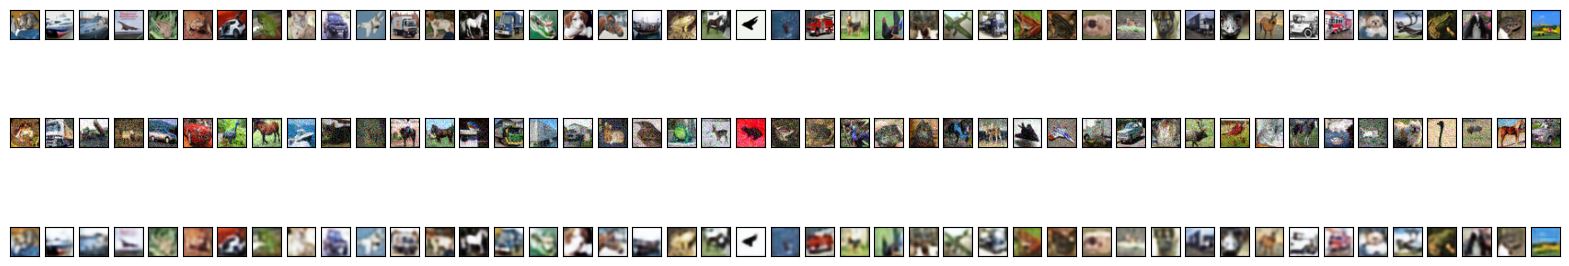

In [ ]:
import matplotlib.pyplot as plt

n = 45
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32 , 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1+n)

    plt.imshow(x_train_noisy[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(32, 32 , 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

